Welcome! Today, I am going to demonstrate how to train a Logistic Regression model in order to make predictions on species of penguins using the Palmer Penguins dataset. We will cover how to find visualize and select good qualitative and quantiative predictors, bruteforce feature selection, how to plot decision regions, confusion matrices in attempt to show a comprehensive guide of the process of making a predictor model with a dataset.

# Acquring the Data
We are first going to import two popular data science python libraries, pandas and numpy. After this, we are going to get our Palmers Penguins dataset from the url listed below, and use pandas to convert the csv file into a DataFrame which will be stored in the variable train.

In [ ]:
import pandas as pd
import numpy as np

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

Let's see 5 of the pieces of data we are working with using the head() method.

In [84]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


# Data Preperation
We are now going to prepare the data. Here we drop columns that are likely unhelpful in making a prediction on the species of penguins, specifying axis = 1 to delete the column instead of the index. We then remove all rows were the value of df["Sex"] is undefined or ".". We use the method dropna() to drop all the rows that contain missing values. We then use the method fit() from the LabelEncoder object to pick numerical values from qualitative values. For example, our penguin species are "Gentoo", "Chinstrap", and "Adelie" which could be encoded as 0, 1, and 2. Now that we have encoded the values of the "Species" column, we create a column that uses that encoding with le.transform, and we want to use the encoded values on the "Species" column, so we will do le.transform(df["Species"]) and store this new column in y. We will then drop the original Species column as we will not need it for our prediction. Finally, we do pd.get_dummies(df) which will convert all categorical variables that only have 2 unique values to a 0 or a 1. With this, we have prepared are data and are ready to use it to make predictions on species of Penguins.


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

for i, c in enumerate(le.classes_):
    print(f"Class number {i} represents {c} penguins.")

X_train, y_train = prepare_data(train)

Class number 0 represents Adelie Penguin (Pygoscelis adeliae) penguins.
Class number 1 represents Chinstrap penguin (Pygoscelis antarctica) penguins.
Class number 2 represents Gentoo penguin (Pygoscelis papua) penguins.


Here, we also enumerated through the classes made by the LabelEncoder and used a fstring to cleanly show which number encoding referes to which penguin.

Now we can see that we have removed unnessecary columns, dropped rows with empty values, and changed qualitative columns to columns of True or False (1 or 0) values: 

In [86]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


# Data Visualizations
Here we are going to visualize the relationship between some quantative data to get a feel for what features might be useful for our predictor model. 

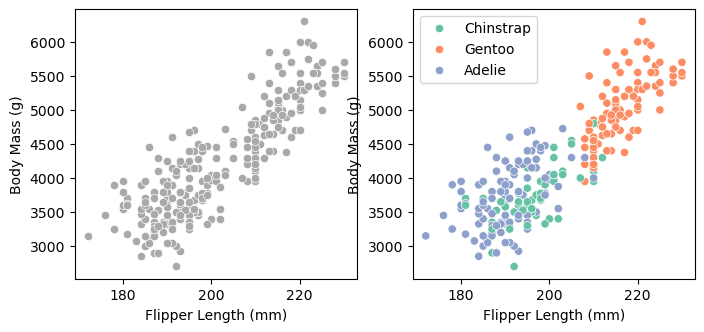

In [113]:
import seaborn as sns
from matplotlib import pyplot as plt
le.classes_ = ["Adelie", "Chinstrap", "Gentoo"]
species_names = [le.classes_[i] for i in y_train]

fig, ax = plt.subplots(1, 2, figsize = (8, 3.5))

p1 = sns.scatterplot(X_train, x = "Flipper Length (mm)", y = "Body Mass (g)", ax = ax[0], color = "darkgrey")
p2 = sns.scatterplot(X_train, x = "Flipper Length (mm)", y = "Body Mass (g)", ax = ax[1], hue = species_names, palette="Set2")

Here we can see that the relationship between Flipper Length and Body Mass is good for distinguishing between Gentoo penguins and the other two species (data shows that Gentoo penugins on average have a greater body mass and flipper length than the two other species), however it is not so good for dintinguishing between the Adelie and Chinstrap penguin species.

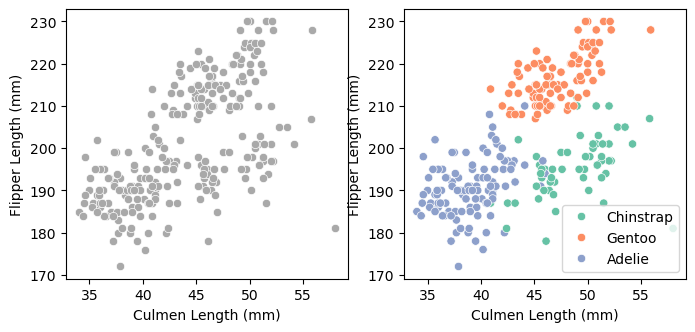

In [114]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3.5))

p1 = sns.scatterplot(X_train, x = "Culmen Length (mm)", y = "Flipper Length (mm)", ax = ax[0], color = "darkgrey")
p2 = sns.scatterplot(X_train, x = "Culmen Length (mm)", y = "Flipper Length (mm)", ax = ax[1], hue = species_names, palette="Set2")

We can see here that utilizing the culmen length and the flipper length gives rather distinct groups where each species of penguins resides. While some points overlap, showing that these variables don't 100% identify a penguin's species, it is certainly better at identifying chinstrap and adelie penguins from the last set of variables.

# Summary Tables and Aggregate Values
Beyond plotting which is good for visualizing quantiative features and there usefulness, we can use aggregate values to gain more information on quantiative features such as sex, island, and clutch completion.

In [89]:
train.groupby("Clutch Completion").size() / X_train.shape[0]

Clutch Completion
No     0.117188
Yes    0.957031
dtype: float64

In [90]:
train.groupby("Sex").size() / X_train.shape[0]

Sex
.         0.003906
FEMALE    0.519531
MALE      0.511719
dtype: float64

In [91]:
train.groupby("Island").size() / X_train.shape[0]

Island
Biscoe       0.511719
Dream        0.398438
Torgersen    0.164062
dtype: float64

Here we can see the percentage of all the penguins split between the various qualitative features (Sex, Island, and Clutch Completion). With this we can see that clutch completion will probably not help us determine the species of a particular penguin as for 95% of the penguins in the dataset Clutch_Completion is true. On the other hand, it seems that half of the penguins are male and the other half female, and that a penguin's location on one of the three islands is also quite varied, making these qualiative features more useful for predictions than cluch completion.

# Feature Selection
Our current task now is to find three of these features listed where 2 are quantiative and 1 are quantitative that will predict with high accuracy the species of Penguin (either Gentoo, Chinstrap, or Adelie).

In [92]:
print(X_train.columns)

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Island_Biscoe', 'Island_Dream', 'Island_Torgersen',
       'Stage_Adult, 1 Egg Stage', 'Clutch Completion_No',
       'Clutch Completion_Yes', 'Sex_FEMALE', 'Sex_MALE'],
      dtype='object')


Because we have a relatively small amount of features, we are going to train a logistic regression model on every distinct combination of 2 quantitative feautures and 1 qualitative feature, and keep track in the variable max_score what combination of features (stored in best_features) achieves the highest acurracy.

In [100]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression

test_cols = X_train
best_features = ['None']
max_score = 0

LR = LogisticRegression(max_iter=20000)
all_qual_cols = ["Clutch Completion", "Sex", "Island_Biscoe", "Island_Dream", "Island_Torgersen", "Stage_Adult, 1 Egg Stage"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    test_cols = X_train[cols]
    m = LR.fit(test_cols, y_train)
    score = LR.score(test_cols, y_train)
    if score > max_score:
      max_score = score
      best_features = cols
best_features = best_features[2:] + best_features[0:2]
m = LR.fit(X_train[best_features], y_train)
print(max_score, best_features)

0.99609375 ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex_FEMALE', 'Sex_MALE']


With this, we have discovered that training a logistic regression model on the qualitative feature Sex (Male or Female) and the quantitative features Culmen Length (mm) and Culmen Depth (mm) gives the highest prediction accurracy among all the other 3 feature combinations with a accuracy of 99.5% on the training data.

# Testing the model on unseen data
We have achieved high accuracy using the training data, but can we achieve similar results using a different subset of data?

In [94]:

test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[best_features], y_test)

0.9852941176470589

We can see that the accuracy of our model on new data is only slightly worse at 98.5%.

# Plotting Decision Regions
We can more explicitly display how our model is deciding the species of penguins with our selected features with this plot_regions function.

In [103]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

We are first going to run this using the training data:

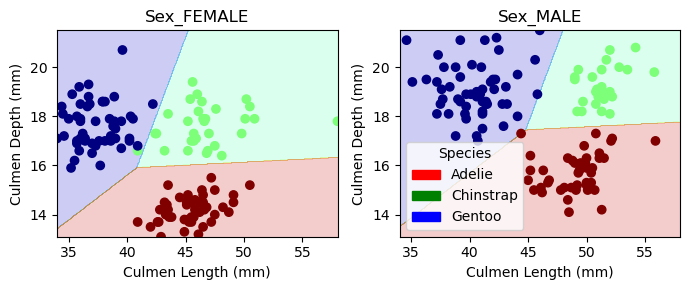

In [104]:
plot_regions(LR, X_train[best_features], y_train)

Then, we are going to run it through the testing data:

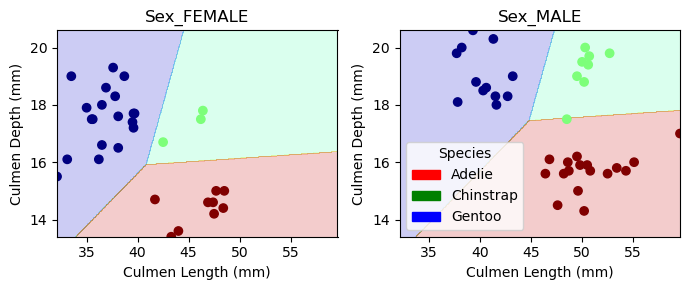

In [105]:
plot_regions(LR, X_test[best_features], y_test)

Here we can see that the distinct regions that model predicted each of the 3 species of penguins would be located at mostly correlates with the actual positions and species of the penguin data points, giving a more visual representation of our accuracy value of 99.6% on training data and 98.5% on testing data.

# Confusion Matrix
Using the confusion_matrix function from sklearn, we can create a matrix that shows the accurate and inaccurate predictions of our model.

In [99]:
from sklearn.metrics import confusion_matrix

y_test_pred = LR.predict(X_test[best_features],)
C = confusion_matrix(y_test, y_test_pred)
C

array([[31,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 26]])

Here, on the diagonal of the matrix is the correct guesses, with each row corresponding to each possible label prediction (Chinstrap, Adelie, or Gentoo).
We can make the output of our confusion matrix more appearent by returning to our LabelEncoder and looping through its contents:

In [67]:
for i in range(3):
    for j in range(3):
        print(f"There were {C[i,j]} {le.classes_[i]} penguin(s) who were classified as {le.classes_[j]}.")

There were 31 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 0 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were 0 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Gentoo penguin (Pygoscelis papua).
There were 0 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 10 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were 1 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Gentoo penguin (Pygoscelis papua).
There were 0 Gentoo penguin (Pygoscelis papua) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 0 Gentoo penguin (Pygoscelis papua) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were

We can see that the only error the model made on the testing data was that it misidentified a Chinstrap penguin for a Gentoo penguin. This correlates with the plot_regions output using the training data, as the points that represent Chinstrap penguins were often close or in the region that predicts a penguin will be a Gentoo penguin.

# Closing
With this, we have predicted with high accuracy the species of penguins within the Palmer Penguins dataset. Through the process of feature selection and plotting data we found that the sex, culmen length and depth of penguins within the dataset are the best features to predict the particular species of that penguin. This exercise has taught me the general workflow of creating a predictor model with sklearn, numpy and pandas from start to finish. I also learned techniques of plotting data (scatterplots, desicion regions) what a confusion matrix is and how to interpret it, and the process of feature selection.